In [1]:
# Load required libraries

import requests
import numpy as np
import os

from Magics import toolbox as magics
from ipywidgets import interact
import ipywidgets as widgets


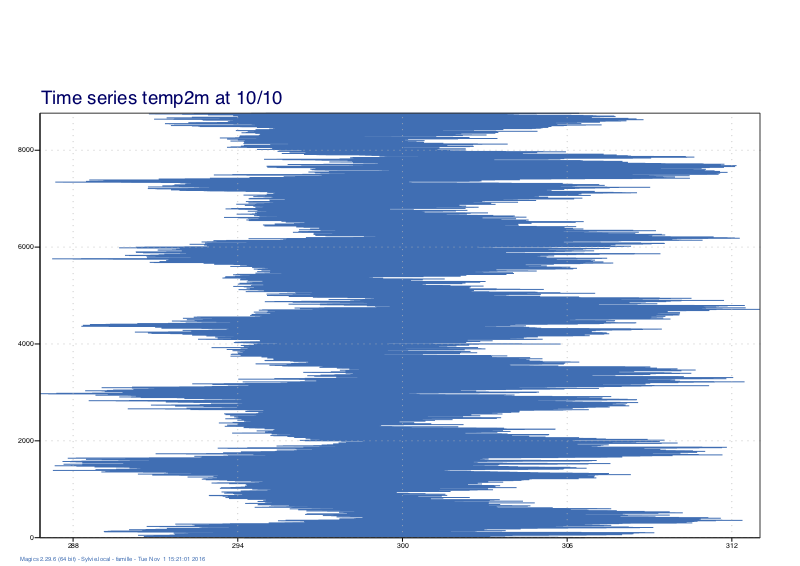

<function __main__.graph>

In [2]:

def graph (lat, lon, param, color, style) :
    url_fmt = 'http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1' \
          '&request=ProcessCoverages' \
          '&query=for c in (%s) return encode(c[Lat(%s), Long(%s), ansi("%s":"%s")], "csv") '

    url = url_fmt%(param, lat, lon, "2000-01-01T00:00:00+00:00","2005-12-31T00:00:00+00:00")
    
    r= requests.get(url,
                    proxies={'http':None}
                    )

    r.raise_for_status()

    # Store the requested data in a numpy array
    yy = np.array(eval(r.text.replace('{','[').replace('}',']')))
    xx =  range(len(yy))
   
    
    
    return magics.graph(yy, xx, 
            title = "Time series %s at %d/%d" % ( param , lat, lon), 
            graph = { "graph_line_colour" : color, "graph_line_style" : style },
           )
    
# , 

interact(graph, lon=widgets.IntSlider(min=-180,max=180,step=1,value=10,continuous_update=False),
         lat=widgets.IntSlider(min=-90,max=90,step=1,value=10,continuous_update=False),
         param = widgets.Dropdown(
            options=['temp2m', 'precipitation', ],
            value='temp2m',
        ),
        color = widgets.Dropdown(
            options=[ "ecmwf_blue", 'navy', 'evergreen', ],
            value='ecmwf_blue',),
        style = widgets.Dropdown(
            options=[ "solid", 'dash', 'dot', ],
            value='solid',) 
         )
